## COLORECTAL CANCER DETECTION

#### SOFT COMPUTING TECHNIQUES

> IMPORT REQUIRED LIBRARIES

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

> import dataset

In [9]:
data = pd.read_csv("data.csv")

In [6]:
data.head(5)

,71.8,6.22,0.261,4.49,327,0.192,0.00096,7.17,0.00211,3.69E-07,2.68E-11,2.04E-11,4.19E-22,1.19E-14,2.28E-22,1
0,71.2,6.48,-0.60700,4.30,308.0,0.206,0.000808,7.33,0.00209,3.170000e-07,2.400000e-11,2.470000e-11,1.850000e-22,6.300000e-15,5.740000e-22,1
1,80.1,20.00,-0.61000,2.26,181.0,0.247,0.001060,7.23,0.00259,7.720000e-08,8.200000e-11,1.460000e-10,-1.510000e-20,-3.330000e-14,4.950000e-21,1
2,52.7,5.38,0.05730,2.41,175.0,0.259,0.001920,6.58,0.00264,3.490000e-09,1.520000e-10,6.900000e-11,-6.410000e-21,-2.810000e-16,-2.970000e-21,1
3,57.1,6.00,0.00263,2.47,207.0,0.245,0.001510,6.79,0.00247,2.650000e-08,1.530000e-10,3.670000e-11,-2.720000e-21,-2.020000e-15,-3.840000e-22,1
4,65.9,6.40,0.21300,2.69,283.0,0.220,0.001240,6.93,0.00211,3.750000e-08,7.430000e-11,1.830000e-11,-6.430000e-22,2.460000e-16,-2.010000e-22,1


In [11]:
from sklearn import datasets
%matplotlib notebook

In [15]:
data_new=data.as_matrix()

C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


> VISUALIZE THE DATA

<IPython.core.display.Javascript object>


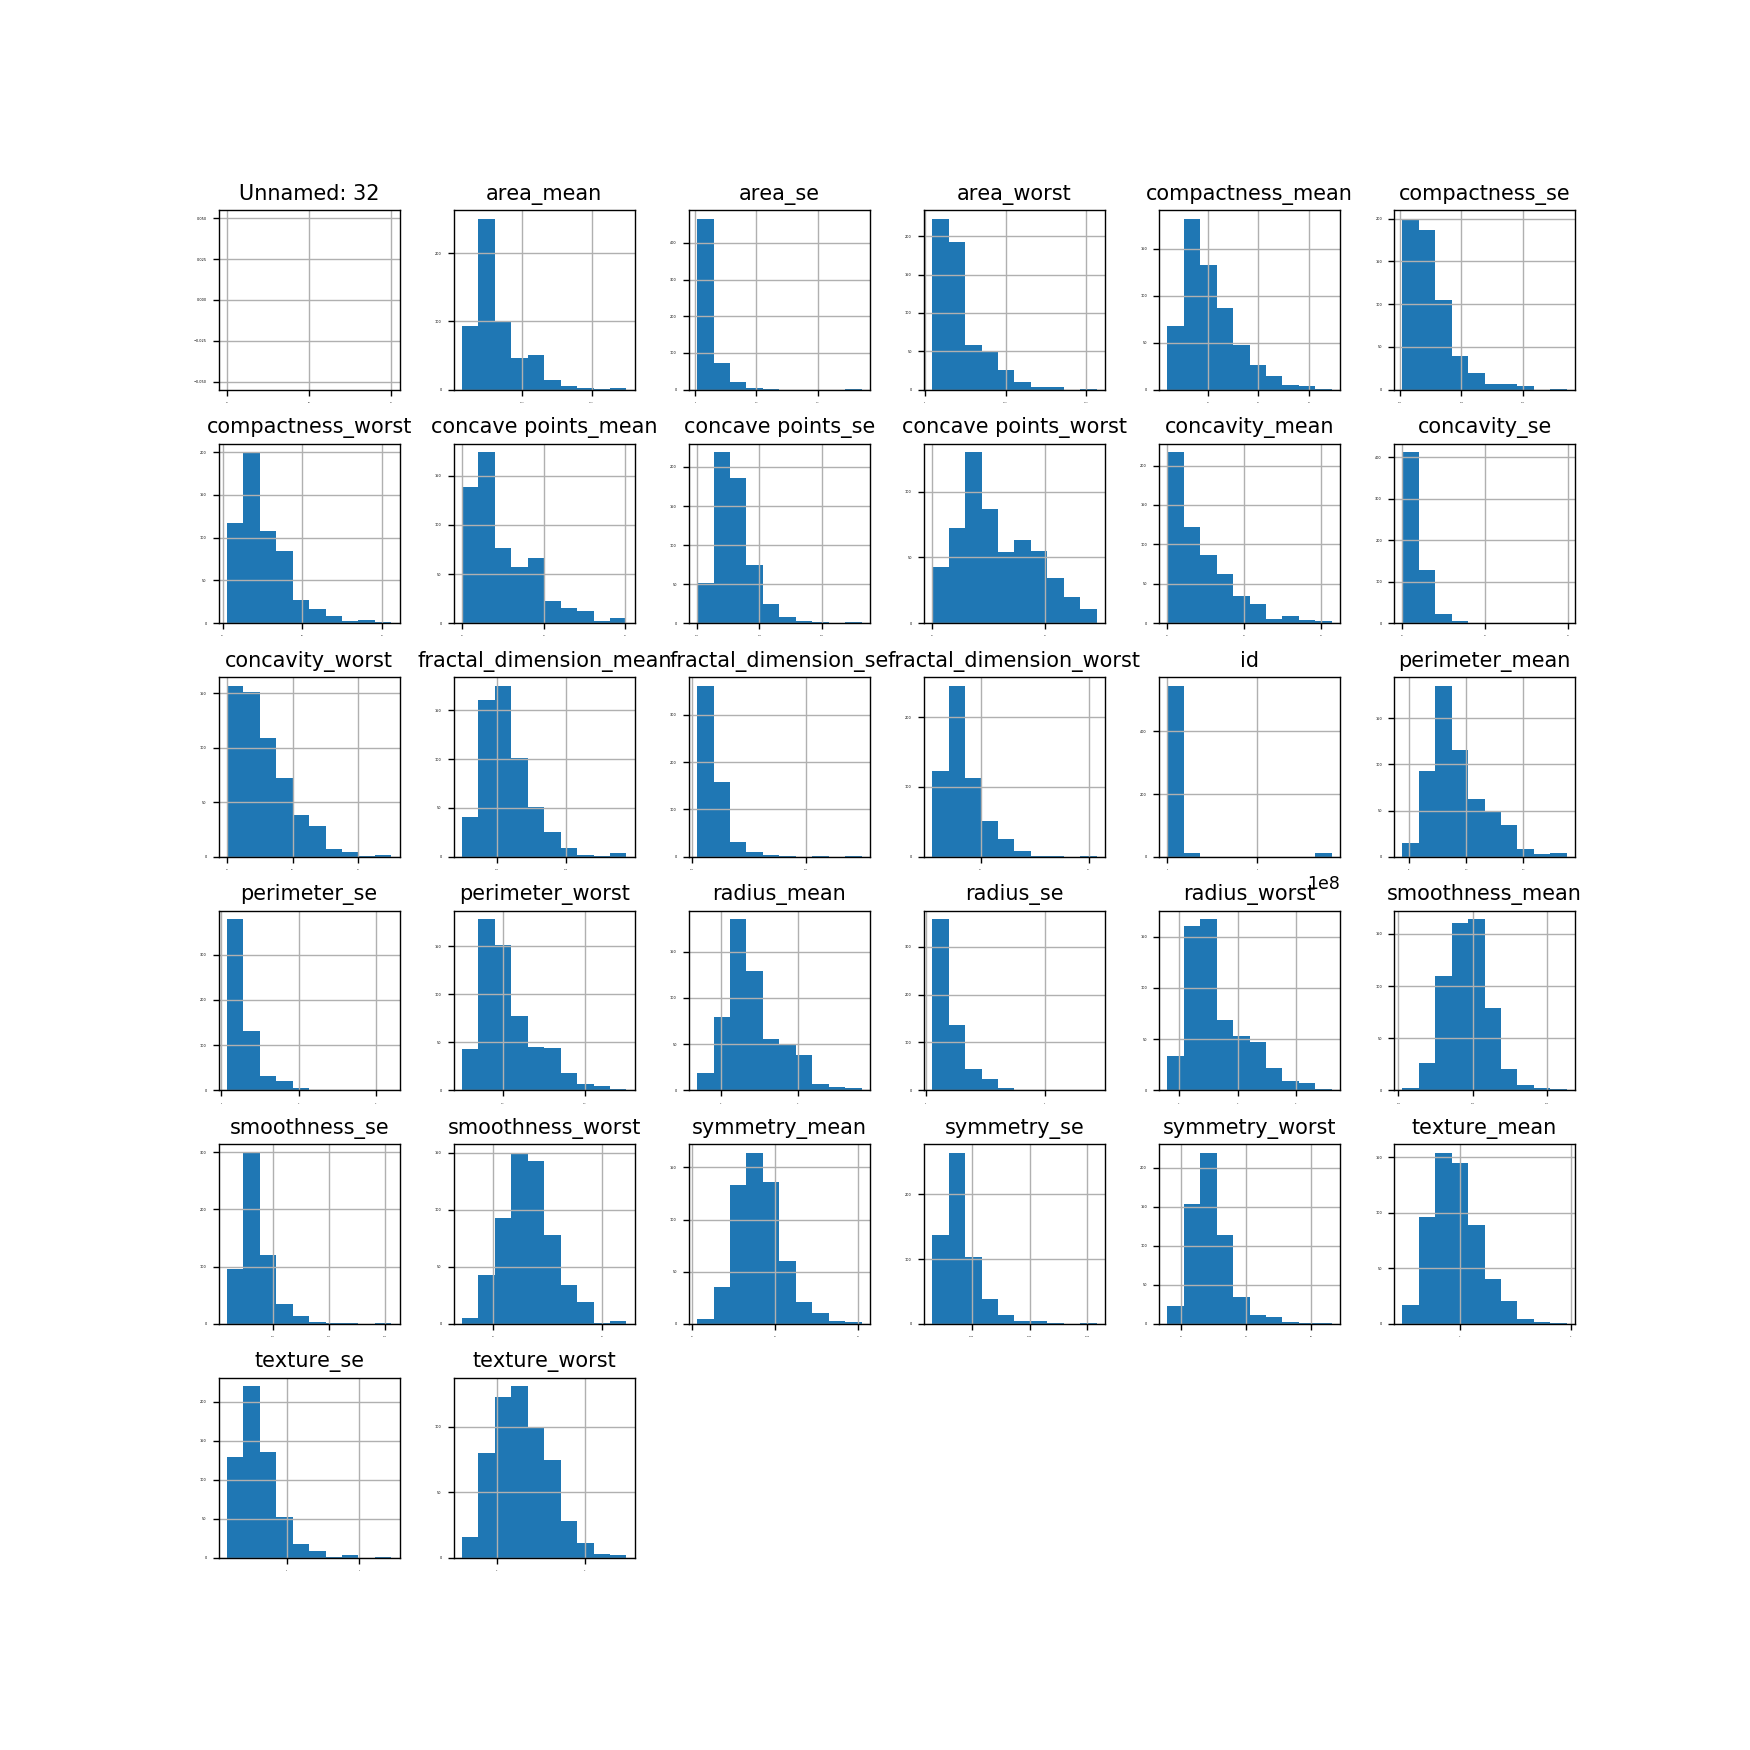

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B2F4E5E7F0>,
      dtype=object)

In [32]:
data.hist(xlabelsize=1,ylabelsize=2,figsize=(14,14),grid=True)

In [35]:
dataset = []
labels = []
for datas in data_new:
    labels.append(datas[1])
    datas=datas[2:len(datas)-1]
    dataset.append(datas)

> PREPROCESSING